#**ADITYA KIRAN SHAHAPURKAR**
---
# Bike Price Prediction using Linear Regression

---
#Import Library





In [ ]:
import pandas as pd

In [ ]:
import numpy as np

#Import CSV as dataframe

In [ ]:
df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

In [ ]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


#Get missing values derop

In [ ]:
df=df.dropna()

#Get the summary statistics

In [ ]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


#Get categories and counts of categorical variables

In [ ]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [ ]:
 df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [ ]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

#Get column names

In [ ]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

#Get Shape of dataframe

In [ ]:
df.shape

(626, 8)

#Get encoding categorical features


In [ ]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [ ]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

#Define Y and X


In [ ]:
y=df['Selling_Price']

In [ ]:
y.shape

(626,)

In [ ]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [ ]:
x=df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [ ]:
x.shape

(626, 5)

In [ ]:
x

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


#Get train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

#Get model train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

#Get model prediction

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred.shape

(188,)

In [ ]:
y_pred

array([ 27210.52271465,  56340.08335163,  63471.94671996,  53627.63844785,
        55612.75744268,  53888.92259719,  33751.35275102,  60311.4950183 ,
       113713.05684467,  76639.49332954,  27826.7399381 ,  49919.83255841,
        65886.64311457,  26755.12664064,  48277.75426038, 127646.56079335,
        70047.10661635,  39350.67963653,  36081.03597878,  45360.79436339,
        48079.89470577,  44803.02464799,  55161.44026111,  71041.51821318,
        91689.22699159,  49301.53594645,  55988.19326252, 108171.54600296,
        32771.06897901,  25468.20072996,  17128.61806164, 179271.41130746,
        45698.99857622,  31371.09285079,  67886.52106737,  41492.49575815,
        56855.22238602,  47820.47003468,  74682.14053958,  24984.21822736,
        55374.00513699,  41412.36775222,  67991.60287764,  26553.59421844,
        89788.69870689,  45764.83633686, 133888.03770389, 106988.113825  ,
        71176.40667714,  25332.25485946,  79512.43778826,  63914.38088173,
        28632.12110986,  

#Get model evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

554715615.5043668

In [ ]:
mean_absolute_error(y_test,y_pred)

12225.7370104107

In [ ]:
r2_score(y_test,y_pred)

0.8810414402984937

#Get visualization of actual vs predicted results

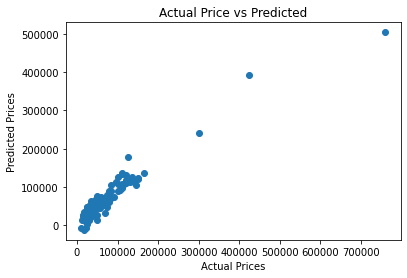

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted")
plt.show()

#Get future prediction

In [ ]:
df_new=df.sample(1)

In [ ]:
df_new 

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
279,Bajaj,Bajaj V15,50000,2017,0,0,9000,65626.0


In [ ]:
df_new.shape

(1, 8)

In [ ]:
x_new=df_new.drop(['Brand','Model','Selling_Price'],axis=1)

In [ ]:
y_pred_new=lr.predict(x_new)

In [ ]:
y_pred_new 

array([56453.74542453])